In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Income dataset

In [3]:
income = np.loadtxt('data/income.csv',
                    converters = {0: lambda x: float(x)},
                    skiprows = 1,
                    usecols = [1,2],
                    delimiter = ',',
                    encoding = 'utf-8')

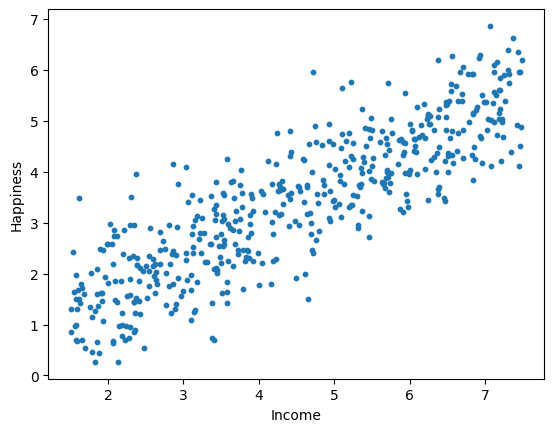

In [4]:
f ,ax = plt.subplots()
ax.scatter(income[:,0],income[:,1], s= 10)
ax.set_xlabel('Income')
ax.set_ylabel('Happiness')
plt.show()

## Ordenada = 0

In [5]:
x,y = income[:,0], income[:,1]

In [6]:
x.shape, y.shape

((498,), (498,))

In [7]:
x = x.reshape((498,1))
y = y.reshape((498,1))

In [8]:
b = np.dot(np.dot(x.T,x)**(-1), np.dot(x.T,y))

In [9]:
b.shape

(1, 1)

In [13]:
xspace = np.linspace(0,8,240)
y_hat =  (xspace * b).reshape((240,1))

In [14]:
y_hat.shape, xspace.shape

((240, 1), (240,))

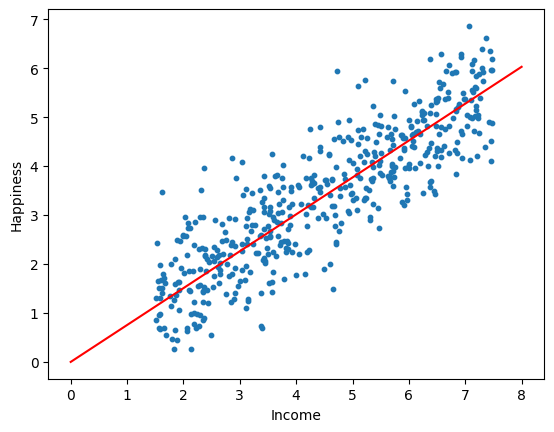

In [15]:
f, ax = plt.subplots()
ax.scatter(income[:,0],income[:,1],s=10)
ax.plot(xspace,y_hat, color='red')

ax.set_xlabel('Income')
ax.set_ylabel('Happiness')
plt.show()

$y = b x$

In [16]:
b

array([[0.75355597]])

In [17]:
lr_income = LinearRegression(fit_intercept=False)

In [18]:
lr_income.fit(x,y)

LinearRegression(fit_intercept=False)

In [19]:
lr_income.coef_

array([[0.75355597]])

In [20]:
lr_income.score(x,y)

0.7466499371350135

## Ordenada $\neq$ 0

In [21]:
# Subimos los datos 3 unidades
y2 = y + 5

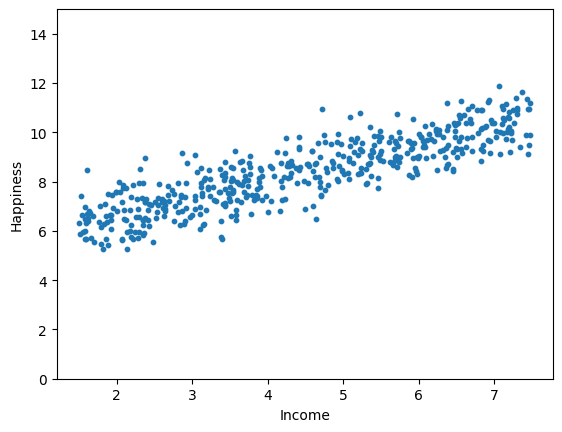

In [23]:
f ,ax = plt.subplots()
ax.scatter(x,y2, s=10)
ax.set_ylim(0,15)
ax.set_xlabel('Income')
ax.set_ylabel('Happiness')
plt.show()

In [24]:
lr_inc2 = LinearRegression(fit_intercept=True)

In [25]:
lr_inc2.fit(x,y2)

LinearRegression()

In [26]:
lr_inc2.coef_

array([[0.71382551]])

In [27]:
lr_inc2.intercept_

array([5.2042704])

In [28]:
yhat2 = lr_inc2.predict(xspace.reshape(240,1))

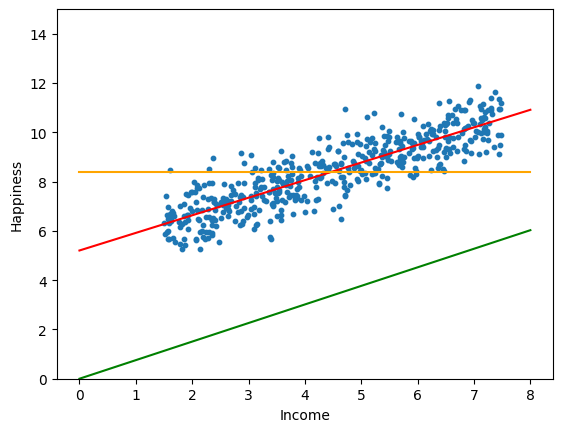

In [30]:
f ,ax = plt.subplots()
ax.scatter(x,y2,s=10)
ax.plot(xspace,yhat2, color='red')
ax.plot(xspace,y_hat, color='green')
ax.plot(xspace,np.mean(y2)*np.ones(xspace.shape[0]), color='orange')

ax.set_ylim(0,15)

ax.set_xlabel('Income')
ax.set_ylabel('Happiness')
plt.show()

**Coeficiente de determinación $R^2$**

In [31]:
lr_income.score(x,y)

0.7466499371350135

In [32]:
lr_inc2.score(x,y)

-11.452758249383887

In [33]:
lr_inc2.score(x,y2)

0.7493217544857415

# Possum

<img src='data/dataset-cover.jpg'>

In [34]:
df = pd.read_csv('data/possum.csv')

In [35]:
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


Para este ejemplo, solo conservaremos variables numéricas y el indicador de sexo.

In [36]:
df = df.loc[:,'sex':]

In [37]:
df.head()

,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


# Preprocessing

## Missing

In [38]:
df.isna().sum()

sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [39]:
len(df)

104

In [40]:
# Se eliminan 3 filas con Nan
df = df[df.isna().sum(axis=1) == 0]

In [41]:
len(df)

101

In [42]:
df.isna().sum()

sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64

# One hot encoding

In [43]:
df.describe(include='O')

,sex
count,101
unique,2
top,m
freq,59


In [44]:
## Utilizando get_dummies de pandas, podemos obtener lo que se llama
## k-1 one hot encoding. Lo veremos en detalle en Análisis de datos!!
df1 = pd.get_dummies(data=df, columns = ['sex'], drop_first=True)

In [45]:
df1

,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,sex_m
0,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0,1
1,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0,0
2,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0,0
3,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0,0
4,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0,0
...,...,...,...,...,...,...,...,...,...,...,...
99,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0,1
100,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0,1
101,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0,0
102,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0,1


In [46]:
columnas = [col for col in df1.columns if ((col != 'sex_m') & (col != 'totlngth'))]

In [47]:
columnas

['age',
 'hdlngth',
 'skullw',
 'taill',
 'footlgth',
 'earconch',
 'eye',
 'chest',
 'belly']

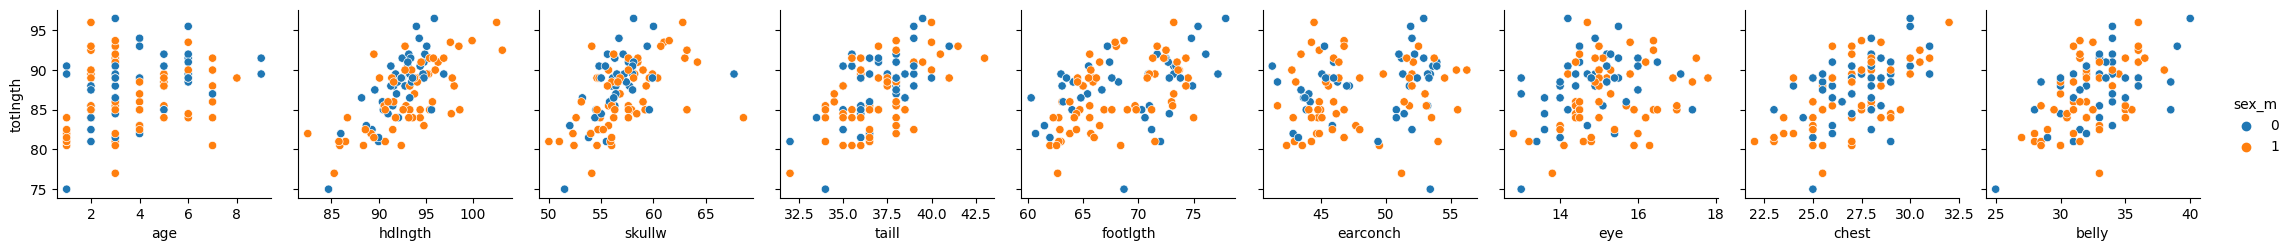

In [48]:
sns.pairplot(df1, hue='sex_m',x_vars=columnas,y_vars='totlngth')
plt.show()

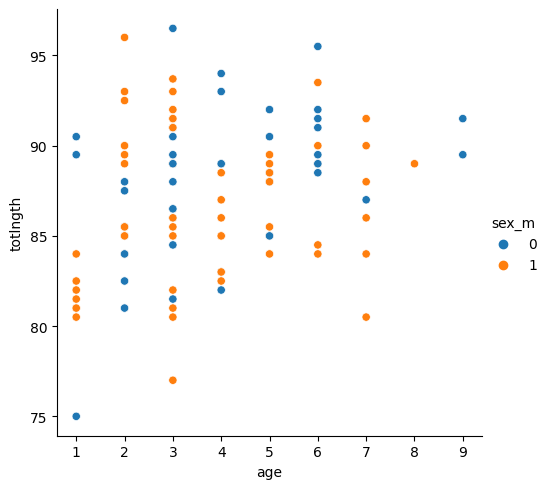

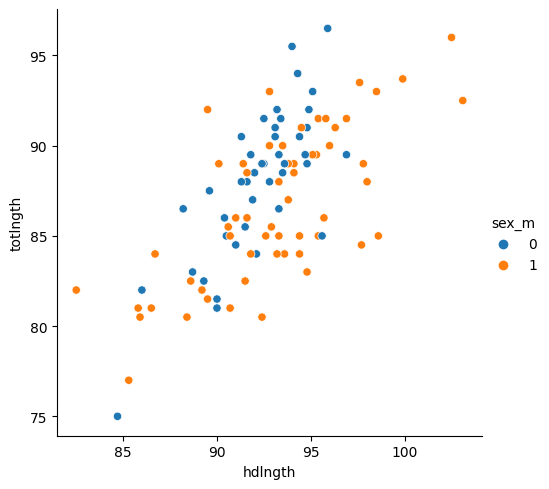

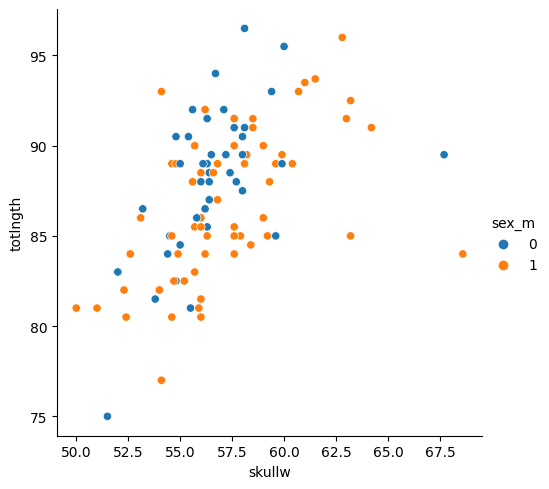

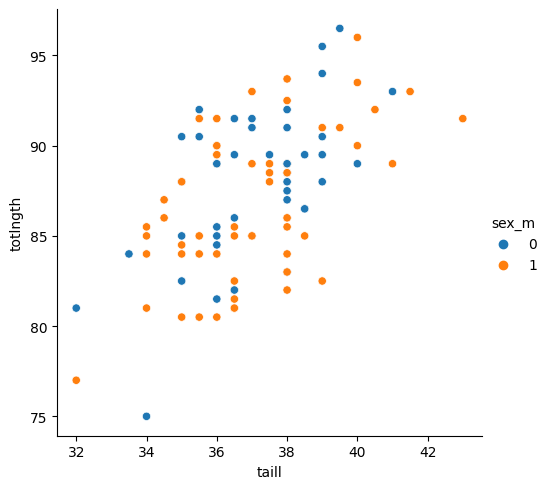

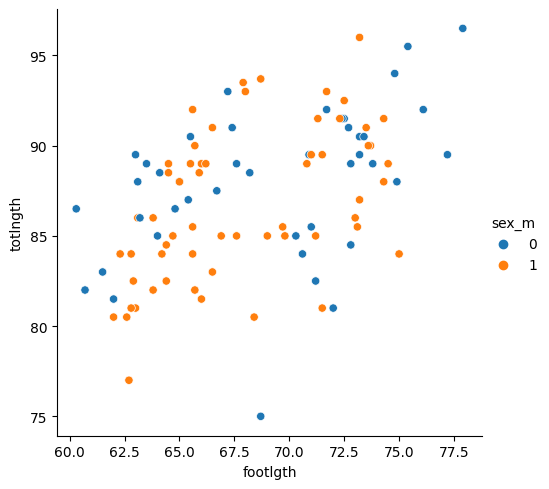

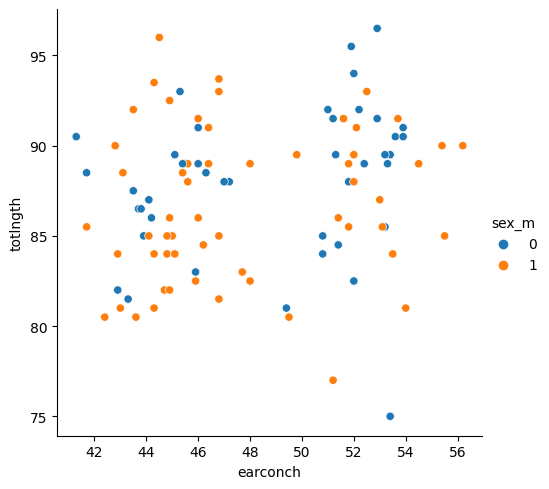

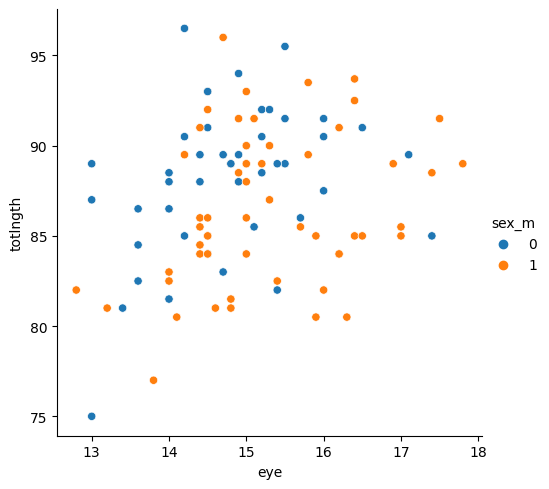

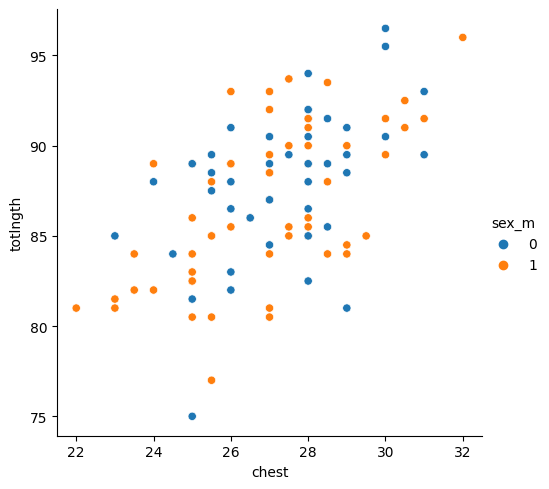

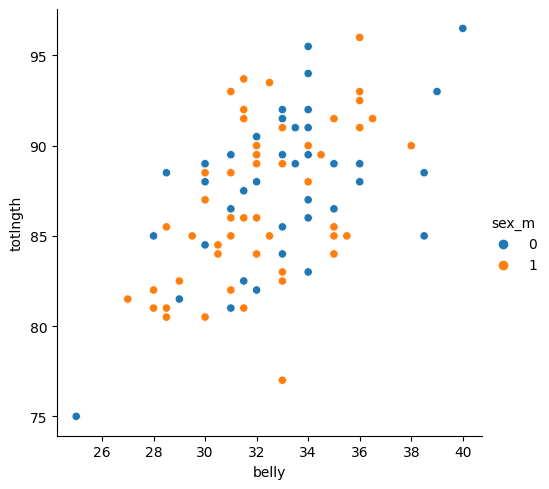

In [49]:
for columna in columnas:
    sns.relplot(x=columna,y='totlngth',hue='sex_m', data=df1)

## Standardize

In [50]:
x = df1[[col for col in df1.columns if col != 'totlngth']]

In [51]:
y = df1['totlngth']

### Train test split
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [52]:
xtrain,xtest,ytrain,ytest = train_test_split(x,
                                             y,
                                             test_size=0.25,
                                             random_state=12,
                                             stratify = x.sex_m
                                             )

In [53]:
std = StandardScaler()

In [54]:
xtrain[columnas] = std.fit_transform(xtrain[columnas])
xtest[columnas] = std.transform(xtest[columnas])

In [55]:
xtrain

,age,hdlngth,skullw,taill,footlgth,earconch,eye,chest,belly,sex_m
46,-0.919189,-0.687331,-0.666989,0.275320,-0.549907,-0.610044,-0.066655,-0.915916,0.183585,1
26,-0.919189,-0.575449,-0.763499,-1.031578,0.447534,0.674344,-0.807263,-1.863416,-1.581654,0
51,1.154170,1.410465,1.327544,1.582218,-0.109177,-0.900849,0.673954,0.742208,0.007061,1
36,-0.919189,-0.911096,-0.666989,-1.031578,0.656301,0.965149,-1.362720,0.505333,-0.345987,0
60,1.672509,0.879023,0.684146,0.536699,-1.222599,-0.755446,-0.066655,-0.205292,-0.522511,1
...,...,...,...,...,...,...,...,...,...,...
16,-1.437529,0.599317,3.482926,-0.247439,1.120226,1.255954,-0.344383,0.979083,-0.522511,0
44,-0.400849,-0.519508,-0.313120,-1.554337,0.725889,1.449823,-0.436959,0.031583,-0.345987,1
11,0.635830,0.655258,-0.409630,-0.770198,0.772282,0.722811,0.211073,0.505333,0.183585,0
58,-0.919189,2.781025,1.906602,1.582218,1.120226,-0.852381,-0.344383,2.400332,1.242728,1


# Regresión lineal

## Con ordenada

In [56]:
lr = LinearRegression(fit_intercept=True)

In [73]:
xtrain[columnas].head()


,age,hdlngth,skullw,taill,footlgth,earconch,eye,chest,belly
46,-0.919189,-0.687331,-0.666989,0.275320,-0.549907,-0.610044,-0.066655,-0.915916,0.183585
26,-0.919189,-0.575449,-0.763499,-1.031578,0.447534,0.674344,-0.807263,-1.863416,-1.581654
51,1.154170,1.410465,1.327544,1.582218,-0.109177,-0.900849,0.673954,0.742208,0.007061
36,-0.919189,-0.911096,-0.666989,-1.031578,0.656301,0.965149,-1.362720,0.505333,-0.345987
60,1.672509,0.879023,0.684146,0.536699,-1.222599,-0.755446,-0.066655,-0.205292,-0.522511


In [74]:
xtest[columnas].head()

,age,hdlngth,skullw,taill,footlgth,earconch,eye,chest,belly
52,-0.400849,0.151787,0.394617,0.536699,-0.225159,-0.488875,1.321986,-0.442167,0.360109
90,-0.400849,1.466406,0.877166,0.536699,-0.665888,-0.004201,-0.066655,-0.442167,-0.169463
3,1.154170,0.179758,0.072918,0.536699,1.792919,1.013616,0.118497,0.505333,0.536633
83,-0.400849,-1.162832,-0.731329,-0.508819,-1.338581,-1.070485,1.136834,-0.915916,-1.405130
70,1.154170,0.067875,0.233768,1.582218,-0.619496,-1.264355,-0.066655,0.268458,0.536633


In [57]:
lr.fit(xtrain[columnas],ytrain)

LinearRegression()

In [58]:
lr.coef_

array([-0.12851069,  1.70164334, -0.09965227,  2.11654873,  0.84334062,
        0.62453974,  0.09326263,  0.30094743,  0.13503937])

In [59]:
lr.score(xtrain[columnas],ytrain)

0.7300932845900293

In [61]:
lr.score(xtest[columnas],ytest)

0.6992755733308115

In [62]:
lr.intercept_

87.05599999999998

## Sin ordenada

In [63]:
lr_sin = LinearRegression(fit_intercept=False)

In [64]:
lr_sin.fit(xtrain[columnas],ytrain)

LinearRegression(fit_intercept=False)

In [65]:
lr_sin.coef_

array([-0.12851069,  1.70164334, -0.09965227,  2.11654873,  0.84334062,
        0.62453974,  0.09326263,  0.30094743,  0.13503937])

In [66]:
lr_sin.intercept_

0.0

In [67]:
lr_sin.score(xtrain[columnas],ytrain)

-415.4087439169484

In [68]:
lr_sin.score(xtest[columnas],ytest)

-515.1628496827888

In [69]:
lr_sin.coef_

array([-0.12851069,  1.70164334, -0.09965227,  2.11654873,  0.84334062,
        0.62453974,  0.09326263,  0.30094743,  0.13503937])

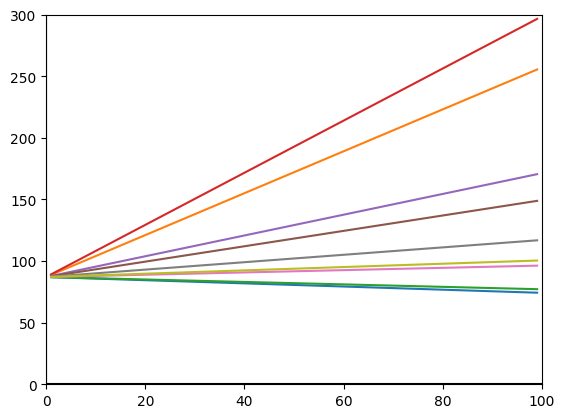

In [82]:
#Función Lineal.
def f(x):
    return lr.coef_*x+lr.intercept_

rango = np.arange(1, 100)

plt.plot(rango, [f(i) for i in rango])

#Establecemos el color de los ejes.
plt.axhline(0, color="black")
plt.axvline(0, color="black")

#Especificamos los limites de los ejes.
plt.xlim(0, 100)
plt.ylim(0, 300)

# Mostramos el gráfico.
plt.show()

Esto quiere decir que esta regresion podemos escribirla como:

\begin{equation}

    \begin{array}{rcl}
        \text{Total Length} &=& -0.128 \cdot \text{age} +
                                1.701 \cdot \text{hdlngth} -
                                0.099 \cdot \text{skullw} +
                                2.116 \cdot \text{taill} + \\
                            & & 0.843 \cdot \text{footlgth} +
                                0.624 \cdot \text{earconch} +
                                0.093 \cdot \text{eye} +
                                0.300 \cdot \text{chest} + \\
                            & & 0.135 \cdot \text{belly}
    \end{array}
\end{equation}